**CS596 - Machine Learning**
<br>
Date: **12 October 2020**


Title: **Seminar 5 - Part A**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

<h2 align="center">Iris Flower Dataset</h2>

- The **Iris flower data** set or **Fisher's Iris data set** is a multivariate data set introduced by the British statistician and biologist **Ronald Fisher** in his **1936**.


- The data set consists of **50 samples** from each of **three species** of Iris: **Iris setosa**, **Iris virginica** and **Iris versicolor**.

<img src="images/S4_Iris.png" width="1000"  alt="Example" />


- **Four features** were measured from each sample: the **length** and the **width** of the **sepals** and **petals**, in **centimeters**. 


- Goal is to **distinguish the species from each other** based on the combination of these four features.

<h3 align="center">Exploratory Data Analysis of The Iris Dataset</h3>

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

#Load the data set
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
df.shape

(150, 5)

In [37]:
df["species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

<h3 align="center">1D Scatter plots</h3>

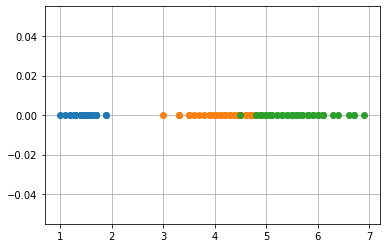

In [38]:
# 1D Scatter plots
setso = df.loc[df["species"] == "setosa"];
virginica = df.loc[df["species"] == "virginica"];
versicolor = df.loc[df["species"] == "versicolor"];

plt.plot(setso["petal_length"],np.zeros_like(setso["petal_length"]), 'o')
plt.plot(versicolor["petal_length"],np.zeros_like(versicolor["petal_length"]), 'o')
plt.plot(virginica["petal_length"],np.zeros_like(virginica["petal_length"]), 'o')
plt.grid()
plt.show()

- **What do we observe**?
  - **Blue** points are **Setosa**
  - **Green** points are **Virginica**;
  - **Orange** points are **Versicolor**;
  - **Virginica** and **Versicolor** are **overlapping**;
  - **1D Scatter** are **very hard to read** and **understand**.

<h3 align="center">2D Scatter plots</h3>

D:\Work\MaxinAI\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


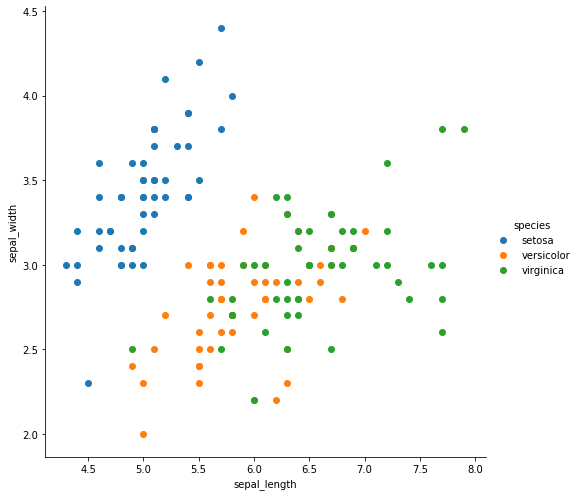

In [39]:
# 2D Scatter plots
sns.FacetGrid(data=df,hue="species",size=7) .map(plt.scatter,"sepal_length","sepal_width") .add_legend()
plt.show()

- **What do we observe**?
  - **Blue** points **can be** easily **separated** from **red** and **green** by drawing a line.
  - But **red** and **green** data points **cannot be** easily **separated**.
  - Using **sepal_length** and **sepal_width** features, we can **distinguish Setosa flowers from others**.
  - **Separating** **Versicolor** from **Viginica** is **much harder** as they have considerable overlap.

<h3 align="center">Pair Plots</h3>

- We have four features **sepal length, sepal width, petal length** and **petal width** that is 6 unique 2D scatter plots.


- We can draw all of them using **Seaborn** method called `pairplot`:

D:\Work\MaxinAI\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


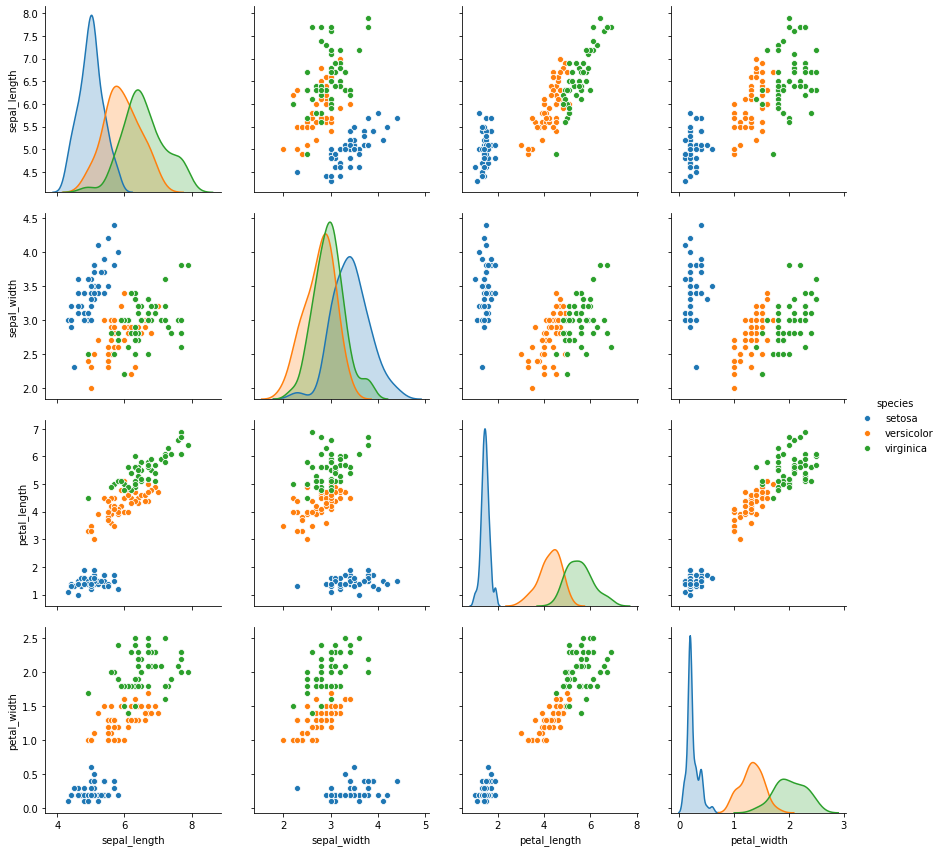

In [40]:
sns.pairplot(df,hue="species",size=3);
plt.show()

- As seen above, the **pair plots** can be divided into **three parts**.


- The **diagonal plot** which showcases the histogram. 
  
  The histogram allows us to see the **PDF/Probability distribution** of a **single variable**;
  
  
- **Upper triangle** and **lower triangle** which shows us the **scatter plot**.
  
  These **upper** and **lower triangles** are the **mirror image of each other**.

<h3 align="center">Iris Flower Dataset Classfication using Logistic Regression</h3>

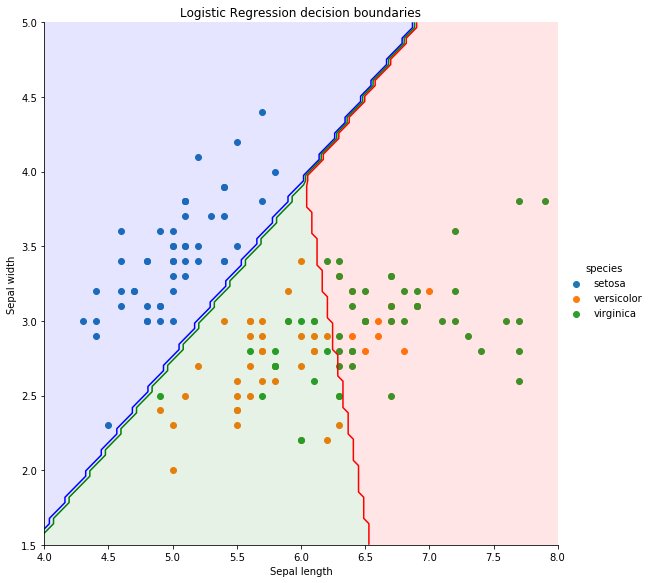

Logistic Regression model accuracy(in %): 83.33333333333334


In [41]:
from sklearn.linear_model import LogisticRegression

# Set up the X and y data
df1 = df[["sepal_length", "sepal_width",'species']]
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

# Fit the model
model = LogisticRegression(C=1e5)
model.fit(X_data,y_labels)

# Define the 2-dimensional classifier over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(df, hue="species", height=8).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
ax = g.ax

# Compute the predicted class function for each value on the grid
z = np.array([model.predict( [[x,y]])[0] for x, y in zip(np.ravel(X), np.ravel(Y))])

# Reshape the predicted class into the meshgrid shape
Z = z.reshape(X.shape)

# Plot the filled and boundary contours
ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Logistic Regression decision boundaries')

plt.show()

# Accuracy evaluation
print("Logistic Regression model accuracy(in %):", model.score(X_data,y_labels)*100)

<h3 align="center">Iris Flower Dataset Classfication using Naive Bayes</h3>

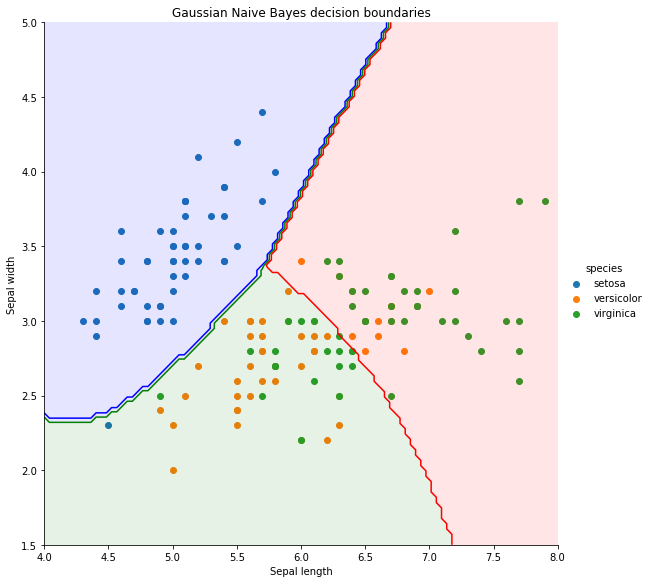

Gaussian Naive Bayes model accuracy(in %): 78.0


In [42]:
# Set up the X and y data
df1 = df[["sepal_length", "sepal_width",'species']]
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

# Fit the model
model = GaussianNB(priors = None)
model.fit(X_data,y_labels)

# Define the 2-dimensional classifier over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(df, hue="species", height=8).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
ax = g.ax

# Compute the predicted class function for each value on the grid
z = np.array([model.predict( [[x,y]])[0] for x, y in zip(np.ravel(X), np.ravel(Y))])

# Reshape the predicted class into the meshgrid shape
Z = z.reshape(X.shape)

# Plot the filled and boundary contours
ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

# Accuracy evaluation
print("Gaussian Naive Bayes model accuracy(in %):", model.score(X_data,y_labels)*100)

<h3 align="center">The Same using Petal Length and Petal Width</h3>

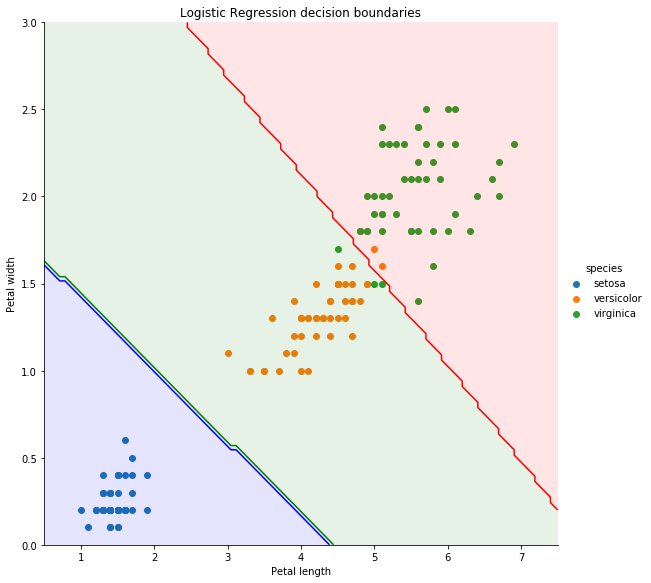

Logistic Regression model accuracy(in %): 96.0


In [43]:
from sklearn.linear_model import LogisticRegression

# Set up the X and y data
df1 = df[["petal_length", "petal_width",'species']]
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

# Fit the model
model = LogisticRegression(C=1e5)
model.fit(X_data,y_labels)

# Define the 2-dimensional classifier over variables X and Y
N = 100
X = np.linspace(0.5, 7.5, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(df, hue="species", height=8 ).map(plt.scatter, "petal_length", "petal_width").add_legend()
ax = g.ax

# Compute the predicted class function for each value on the grid
z = np.array([model.predict( [[x,y]])[0] for x, y in zip(np.ravel(X), np.ravel(Y))])

# Reshape the predicted class into the meshgrid shape
Z = z.reshape(X.shape)

# Plot the filled and boundary contours
ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.set_title('Logistic Regression decision boundaries')

plt.show()

# Accuracy evaluation
print("Logistic Regression model accuracy(in %):", model.score(X_data,y_labels)*100)

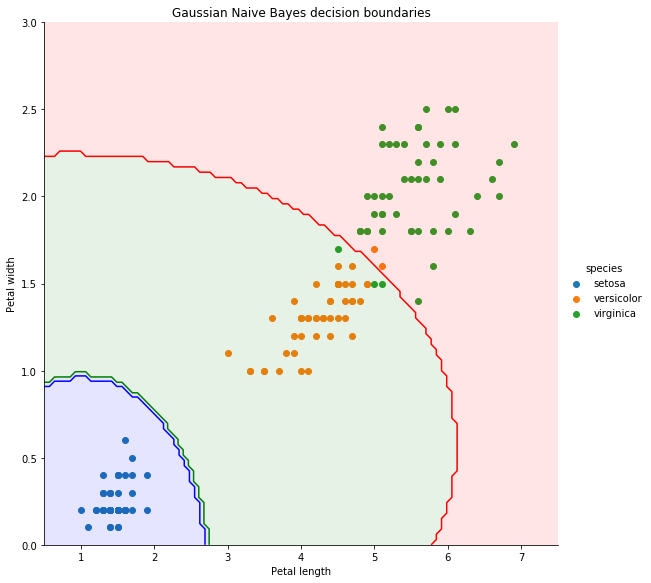

Gaussian Naive Bayes model accuracy(in %): 96.0


In [44]:
# Set up the X and y data
df1 = df[["petal_length", "petal_width",'species']]
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

# Fit the model
model = GaussianNB(priors = None)
model.fit(X_data,y_labels)

# Define the 2-dimensional classifier over variables X and Y
N = 100
X = np.linspace(0.5, 7.5, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(df, hue="species", height=8 ).map(plt.scatter, "petal_length", "petal_width").add_legend()
ax = g.ax

# Compute the predicted class function for each value on the grid
z = np.array([model.predict( [[x,y]])[0] for x, y in zip(np.ravel(X), np.ravel(Y))])

# Reshape the predicted class into the meshgrid shape
Z = z.reshape(X.shape)

# Plot the filled and boundary contours
ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

# Accuracy evaluation
print("Gaussian Naive Bayes model accuracy(in %):", model.score(X_data,y_labels)*100)

Out-of-bag score estimate: 0.96
Mean accuracy score: 0.933


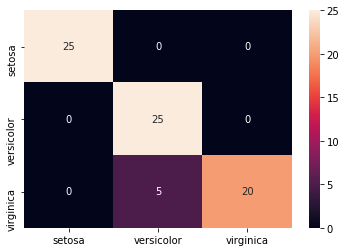

In [56]:
# Set up the X and y data
df1 = df[["sepal_length", "sepal_width" ,"petal_length", "petal_width",'species']]
X_data = df1.iloc[:,0:4]
y_labels = df1.iloc[:,4].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()


# Split the dataset on training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.5, stratify=iris.target, random_state=123456)

# Fit the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123455)
model.fit(X_train, y_train)

# Accuracy evaluation
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'Out-of-bag score estimate: {model.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, pred), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

<h1 align="center">End of Part A</h1>